In [1]:
import contextily
import geopandas as gpd
import rioxarray
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon


/opt/homebrew/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_98101/2099545519.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.rea

In [2]:
new_gdf = gpd.read_file(r'/Users/dhruvpandit/Documents/GitHub/ISEG_AEF/Spatial Econometrics/Spatial Econometrics 23/V11.shp')


In [6]:
# select columns that are not strings
numeric_cols = new_gdf.select_dtypes(exclude=['object'])

print(numeric_cols)


     PPindex202  Mhousesqm  M0_14  M15_24  M25_64   M65  F0_14  F15_24  \
0         74.21      279.0    142     116     737   586    123     118   
1         76.56      262.0    161     131     670   394    137     115   
2         79.51      700.0   1649    1219    5763  2348   1573    1208   
3         83.41      721.0   3974    3427   17848  6778   3707    3469   
4        130.55      800.0   1395    1214    5690  2082   1286    1135   
..          ...        ...    ...     ...     ...   ...    ...     ...   
273       66.59      490.0    130     116     711   485    158     109   
274       74.56      302.0    226     228    1337  1014    229     239   
275       74.09      313.0    211     155     672   370    203     176   
276       90.45      457.0   1490    1089    5123  2174   1402    1080   
277       74.22      232.0    139     122     707   517    149     108   

     F25_64   F65  ...  DVotepct_w  Personel E  Inhb per F  For Pop (%  \
0       730   842  ...    0.008300   

• PPindex2020 – Purchasing Power Index (Portugal = 100)
• Mhousesqm – Median house prices per square meter
• M0_14 – male population between 0 and 14 years
• M15_24 – male population between 15 and 24 years
• M25_64 – male population between 25 and 64 years
• M65 – male population with 65 years or higher
• F0_14 – female population between 0 and 14 years
• F15_24 – female population between 15 and 24 years
• F25_64 – female population between 25 and 64 years
• F65 – female population with 65 years or higher
• TOTALPOP – Total population

• Voters – Total number of voters
• Votepct – Voters Percentage (participation rate)
• party percentages for 10 political parties. 
• DVotepct – change in Voters Percentage from previous national elections (change in
participation)
• DOBN – change in OBN % from from previous national elections

In [28]:
new_gdf['Votepct']

0.003353044007528788

In [13]:
gdf_pca = new_gdf[numeric_cols.columns].copy()
gdf_pca.drop(columns=['geometry'], inplace=True, axis = 1)

In [15]:
gdf_pca.fillna(0, inplace = True)

In [9]:
gdf_pca.columns

Index(['PPindex202', 'Mhousesqm', 'M0_14', 'M15_24', 'M25_64', 'M65', 'F0_14',
       'F15_24', 'F25_64', 'F65', 'TOTALPOP', 'Voters', 'Votepct', 'OBN',
       'DVotepct', 'DOBN', 'Left', 'Centre', 'Right', 'C - left', 'C - right',
       'Tot 0_14', 'Tot 15_24', 'Tot 25_64', 'Tot 65', 'T0_14(%)', 'T15_24(%)',
       'T25_64(%)', ' T65(%)', 'Votepct_we', 'Left_w', 'Centre_w', 'Right_w',
       'Centre_l_w', 'Centre_r_w', 'DVotepct_w', 'Personel E', 'Inhb per F',
       'For Pop (%', 'Env Pr Cap', 'To I p Ca', 'Crime Rate', 'Non fin en',
       'TotStudEnr', 'geometry'],
      dtype='object')

In [16]:
# Import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(gdf_pca)

pca = PCA(n_components=15)
principal_components = pca.fit_transform(scaled_data)

print(pca.explained_variance_ratio_)

[0.42061133 0.1741077  0.08887858 0.07907834 0.04651478 0.03450321
 0.02606848 0.02274994 0.02138752 0.01647163 0.01389948 0.01151219
 0.01008006 0.00968015 0.00637446]


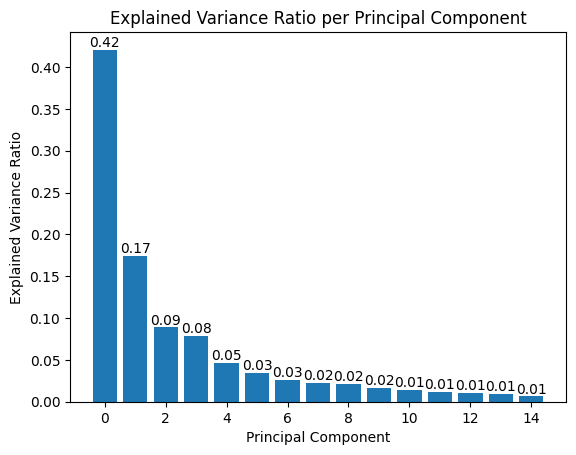

In [17]:

# Create a bar plot of the explained variance ratio
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

# Add labels and title
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

for i, ratio in enumerate(pca.explained_variance_ratio_):
    plt.annotate(f'{ratio:.2f}', xy=(i, ratio), ha='center', va='bottom')

# Show the plot
plt.show()



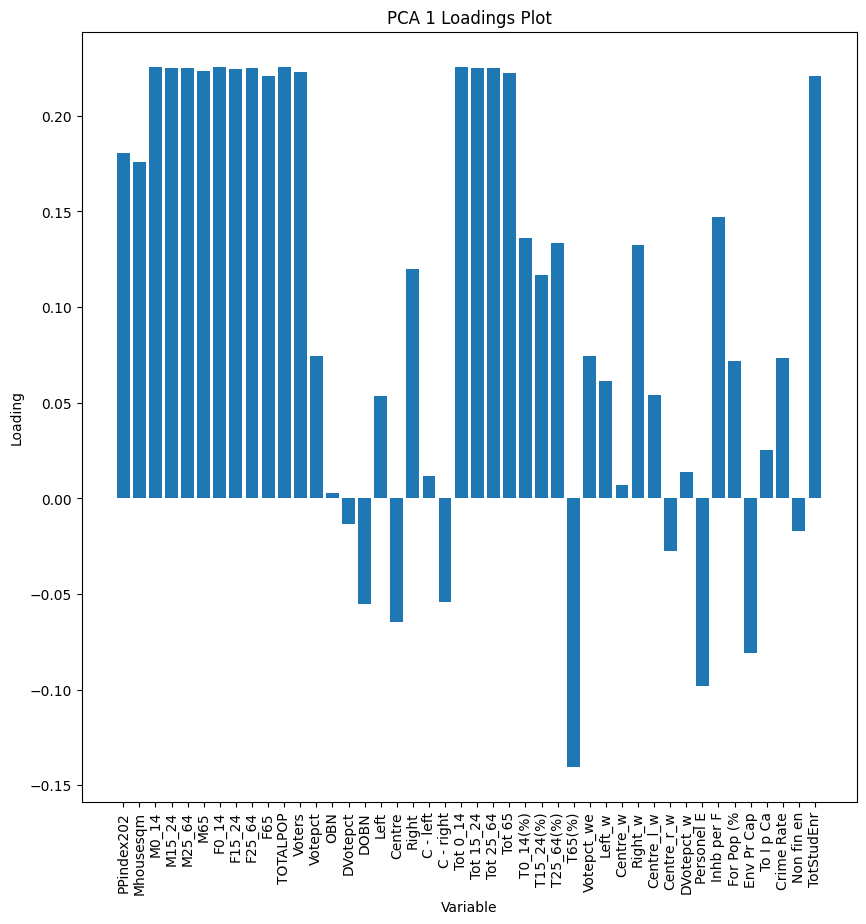

In [18]:
import matplotlib.pyplot as plt

# assuming pca is your fitted PCA object
loadings = pca.components_[0]
fig, ax = plt.subplots(figsize=(10, 10))

# create a bar plot of the loadings
plt.bar(range(len(loadings)), loadings)

# set the x-axis tick labels to be the variable names
plt.xticks(range(len(loadings)), gdf_pca.columns.values, rotation=90)

# add axis labels and title
plt.xlabel('Variable')
plt.ylabel('Loading')
plt.title('PCA 1 Loadings Plot')

# show the plot
plt.show()



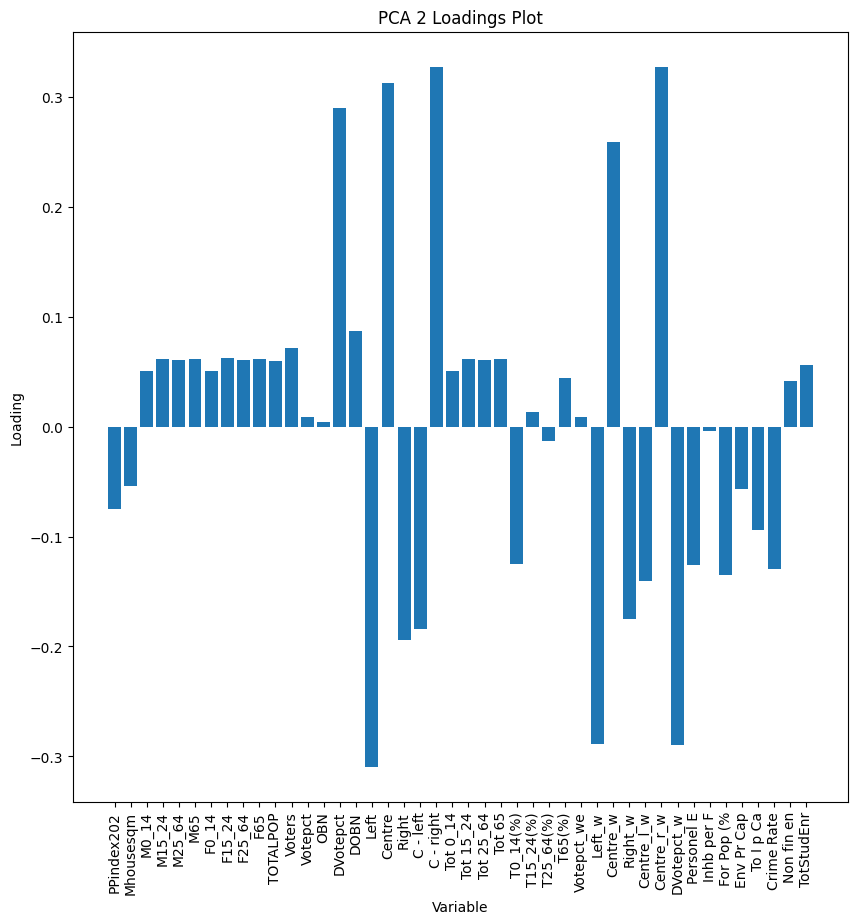

In [20]:
# assuming pca is your fitted PCA object
loadings = pca.components_[1]
fig, ax = plt.subplots(figsize=(10, 10))

# create a bar plot of the loadings
plt.bar(range(len(loadings)), loadings)

# set the x-axis tick labels to be the variable names
plt.xticks(range(len(loadings)), gdf_pca.columns.values, rotation=90)

# add axis labels and title
plt.xlabel('Variable')
plt.ylabel('Loading')
plt.title('PCA 2 Loadings Plot')

# show the plot
plt.show()


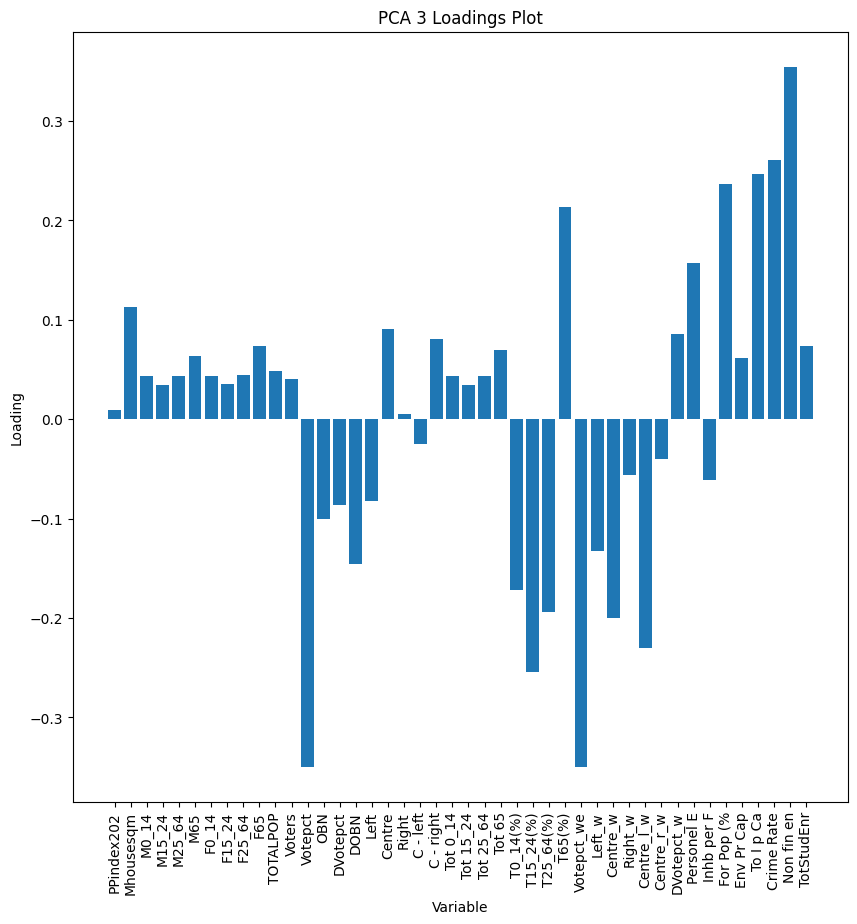

In [21]:
import matplotlib.pyplot as plt

# assuming pca is your fitted PCA object
loadings = pca.components_[2]
fig, ax = plt.subplots(figsize=(10, 10))

# create a bar plot of the loadings
plt.bar(range(len(loadings)), loadings)

# set the x-axis tick labels to be the variable names
plt.xticks(range(len(loadings)), gdf_pca.columns.values, rotation=90)

# add axis labels and title
plt.xlabel('Variable')
plt.ylabel('Loading')
plt.title('PCA 3 Loadings Plot')

# show the plot
plt.show()


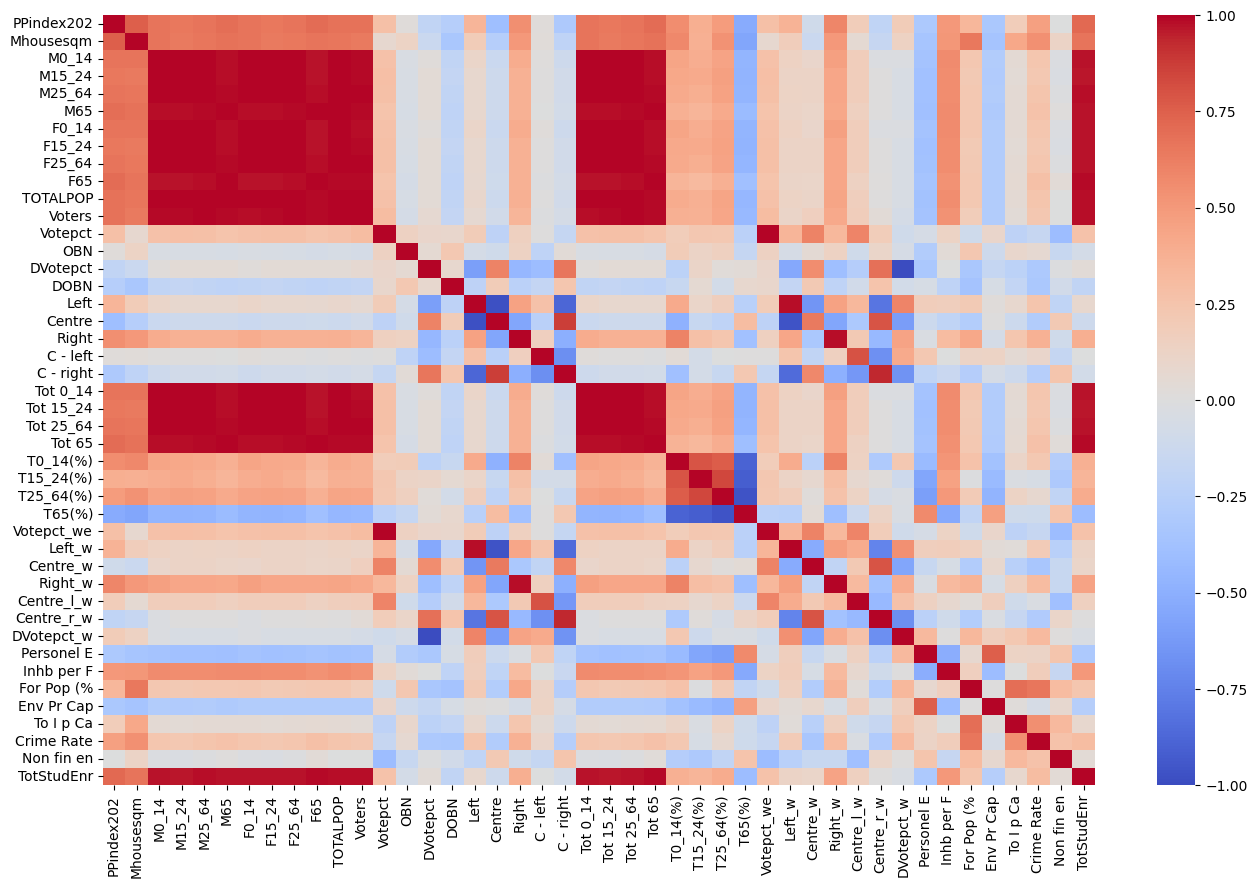

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a correlation matrix for a pandas dataframe
corr_matrix = gdf_pca.corr()

# set figure size
fig, ax = plt.subplots(figsize=(16, 10))

# create heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax)

# show plot
plt.show()


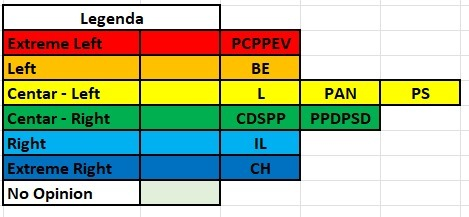

In [23]:
from pysal.explore import esda
from pysal.lib import weights

/opt/homebrew/lib/python3.10/site-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)
/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
# Generate W from the GeoDataFrame
w_k = weights.KNN.from_dataframe(new_gdf, k=5)
# Row-standardization
w_k.transform = "R"

In [26]:
w_q = weights.contiguity.Queen.from_dataframe(new_gdf)
w_q.transform = 'R'

In [111]:
new_gdf.columns

Index(['dico', 'PPindex202', 'Mhousesqm', 'M0_14', 'M15_24', 'M25_64', 'M65',
       'F0_14', 'F15_24', 'F25_64', 'F65', 'TOTALPOP', 'Voters', 'Votepct',
       'BE', 'CDSPP', 'CH', 'IL', 'L', 'PAN', 'PCPPEV', 'PPDPSD', 'PS', 'OBN',
       'DVotepct', 'DOBN', 'concelhos_', 'concelho_1', 'Left', 'Centre',
       'Right', 'C - left', 'C - right', 'Tot 0_14', 'Tot 15_24', 'Tot 25_64',
       'Tot 65', 'T0_14(%)', 'T15_24(%)', 'T25_64(%)', ' T65(%)', 'Votepct_we',
       'Left_w', 'Centre_w', 'Right_w', 'Centre_l_w', 'Centre_r_w',
       'DVotepct_w', 'geometry'],
      dtype='object')

In [112]:
new_gdf["Votepct_lag"] = weights.spatial_lag.lag_spatial(
    w, new_gdf["Votepct"]
)

In [136]:
new_gdf["Centre_l_w_lag"] = weights.spatial_lag.lag_spatial(
    w, new_gdf["Centre_l_w"]
)

In [135]:
new_gdf['Centre_l_w']  = new_gdf['Centre_l_w'] * 100

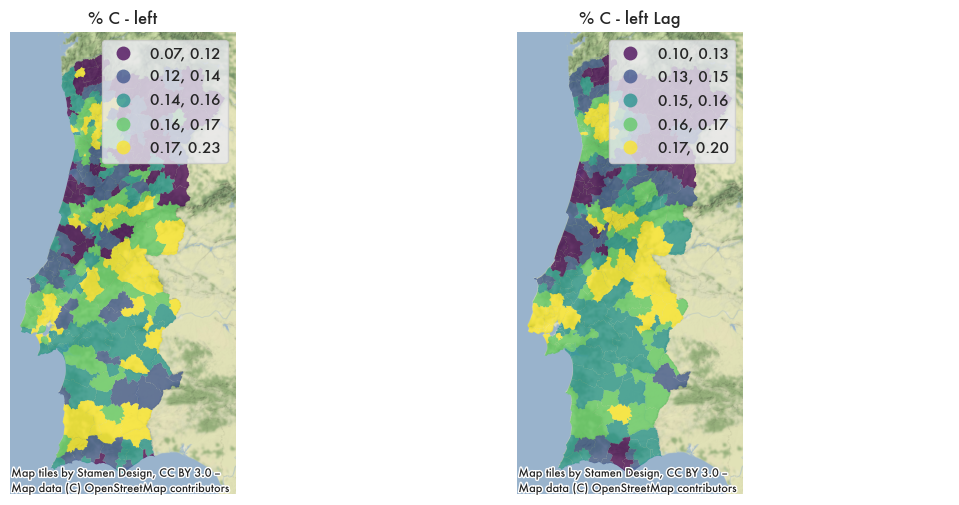

In [137]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs

new_gdf.plot(
    column="Centre_l_w",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax1,
)
ax1.set_axis_off()
ax1.set_title("% C - left")
contextily.add_basemap(
    ax1,
    crs=new_gdf.crs,
    source=contextily.providers.Stamen.TerrainBackground,
)

new_gdf.plot(
    column="Centre_l_w_lag",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax2,
)
ax2.set_axis_off()
ax2.set_title("% C - left Lag")
contextily.add_basemap(
    ax2,
    crs=new_gdf.crs,
    source=contextily.providers.Stamen.TerrainBackground,
)

plt.show()

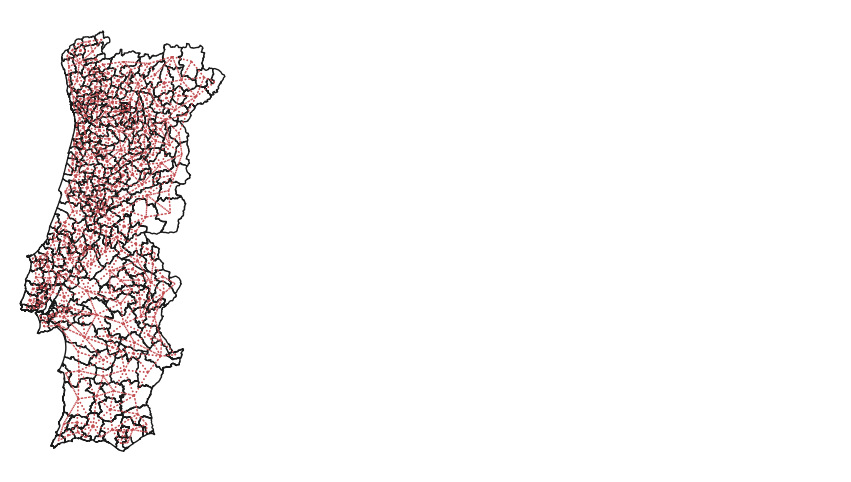

In [122]:
# Plot tract geography
f, axs = plt.subplots(1, 2, figsize=(16, 9))
for i in range(2):
    ax = new_gdf.plot(
        edgecolor="k", facecolor="w", ax=axs[i]
    )
    # Plot graph connections
    w_q.plot(
        new_gdf,
        ax=axs[i],
        edge_kws=dict(color="r", linestyle=":", linewidth=1),
        node_kws=dict(marker=""),
    )
    # Remove the axis
    axs[i].set_axis_off()
axs[1].axis([-13040000, -13020000, 3850000, 3860000])
plt.show()

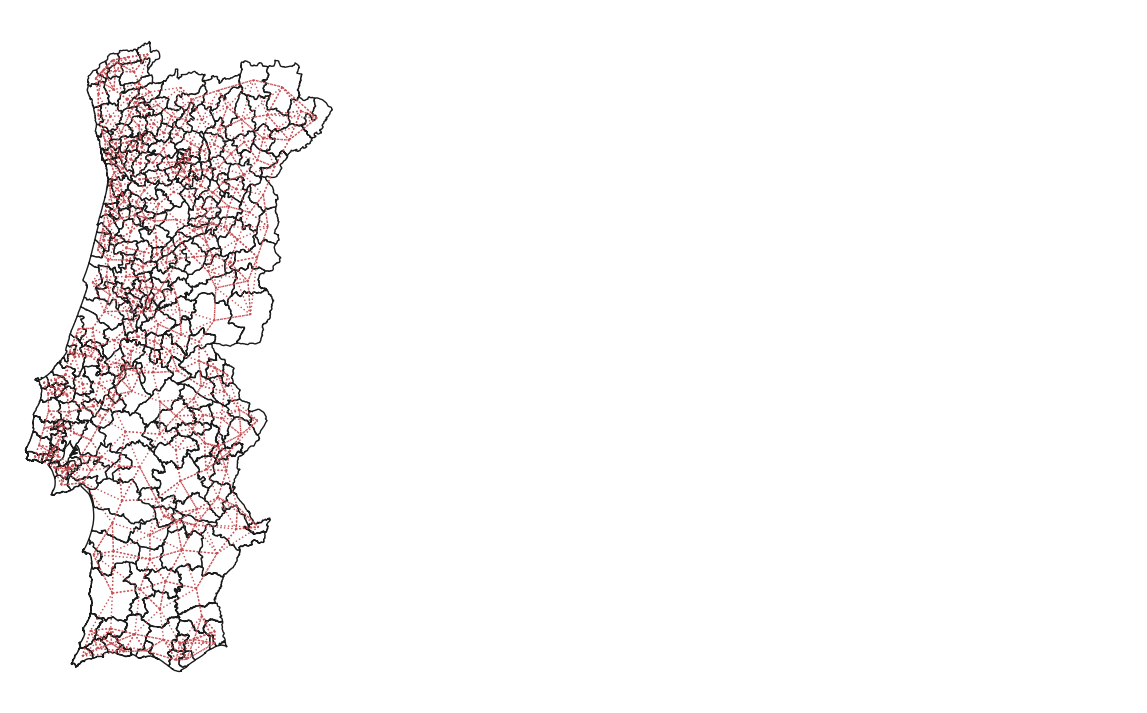

In [125]:
# Plot tract geography
f, axs = plt.subplots(1, 2, figsize=(16, 9))
for i in range(2):
    ax = new_gdf.plot(
        edgecolor="k", facecolor="w", ax=axs[i]
    )
    # Plot graph connections
    w.plot(
        new_gdf,
        ax=axs[i],
        edge_kws=dict(color="r", linestyle=":", linewidth=1),
        node_kws=dict(marker=""),
    )
    # Remove the axis
    axs[i].set_axis_off()
axs[1].axis([-13040000, -13020000, 3850000, 3860000])
plt.show()